# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [ ]:
Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [6]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.3.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [ ]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [ ]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [3]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

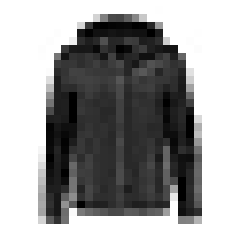

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

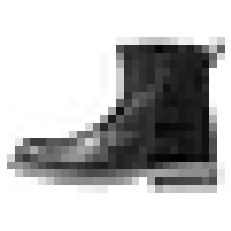

In [ ]:
plt.imshow(X_train[3], cmap="binary")
plt.axis('off')
plt.show()

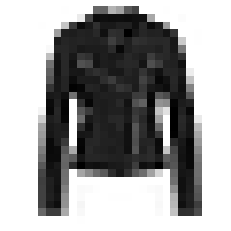

In [ ]:
plt.imshow(X_train[9], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [22]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [ ]:
class_names[y_train[0]]

'Coat'

In [ ]:
class_names[y_train[3]]

'Ankle boot'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

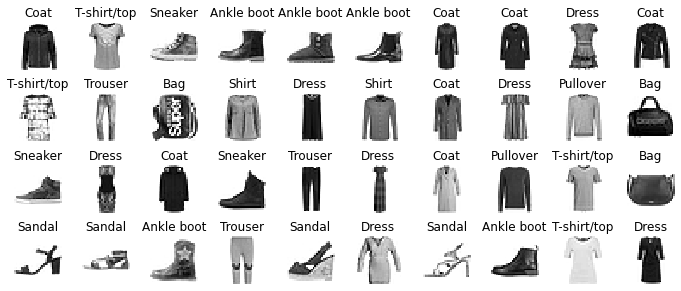

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [8]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [10]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


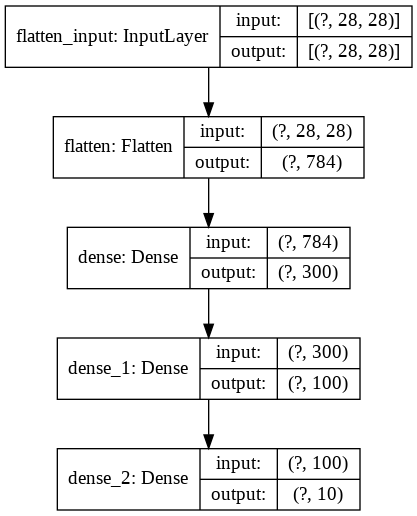

In [ ]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
hidden0 = model.layers[0]
hidden0.name

'flatten'

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[-0.02579143, -0.02607693,  0.03013101, ..., -0.03498784,
         0.03756991,  0.03728417],
       [-0.02371168, -0.00984675,  0.05386323, ...,  0.05078243,
        -0.04730336,  0.02780786],
       [-0.06755311, -0.0645785 ,  0.03675468, ..., -0.05215848,
        -0.05664575,  0.02238189],
       ...,
       [ 0.05764285, -0.04284463, -0.04632498, ...,  0.04677754,
         0.03847817, -0.05916373],
       [-0.01780958,  0.02644382,  0.00049515, ..., -0.04858703,
        -0.03182134,  0.04628294],
       [-0.07413887, -0.02229052,  0.01250377, ...,  0.01042654,
        -0.01371431, -0.05936766]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [12]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7147 - accuracy: 0.7668 - val_loss: 0.4963 - val_accuracy: 0.8354
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4840 - accuracy: 0.8312 - val_loss: 0.4452 - val_accuracy: 0.8466
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4401 - accuracy: 0.8463 - val_loss: 0.4282 - val_accuracy: 0.8508
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4143 - accuracy: 0.8539 - val_loss: 0.3952 - val_accuracy: 0.8626
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3942 - accuracy: 0.8610 - val_loss: 0.3780 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3796 - accuracy: 0.8657 - val_loss: 0.3602 - val_accuracy: 0.8736
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3657 - accuracy: 0.8702 - val_loss: 0.3764 - val_accuracy:

In [13]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [14]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

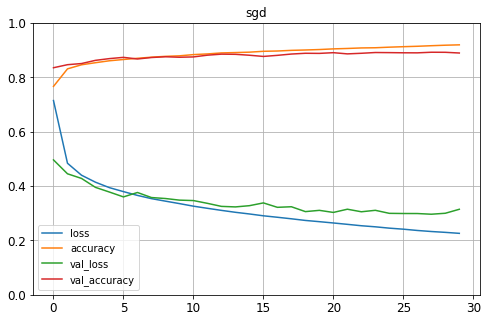

In [39]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5), title=('sgd'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.8782


[0.3489637076854706, 0.8781999945640564]

In [19]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.96, 0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [20]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [23]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [24]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

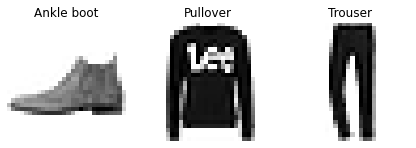

In [25]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

https://keras.io/api/optimizers/

https://keras.io/

1) Plot Learning curves when using different **optimizers** 'RMSprop' and 'Adam'


In [26]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [27]:
history1= model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3749 - accuracy: 0.8631 - val_loss: 0.3719 - val_accuracy: 0.8644
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3292 - accuracy: 0.8790 - val_loss: 0.3738 - val_accuracy: 0.8642
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3080 - accuracy: 0.8861 - val_loss: 0.3556 - val_accuracy: 0.8776
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2922 - accuracy: 0.8927 - val_loss: 0.3418 - val_accuracy: 0.8820
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.8985 - val_loss: 0.3499 - val_accuracy: 0.8820
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2600 - accuracy: 0.9032 - val_loss: 0.3248 - val_accuracy: 0.8868
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2515 - accuracy: 0.9067 - val_loss: 0.3191 - val_accuracy:

In [30]:
print(history1.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [31]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

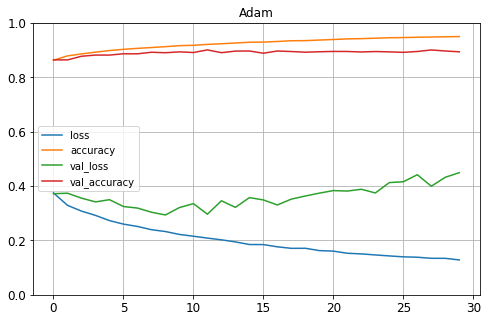

In [32]:
import pandas as pd

pd.DataFrame(history1.history).plot(figsize=(8, 5), title=('Adam'))

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4789 - accuracy: 0.8884


[0.4789488911628723, 0.8884000182151794]

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [36]:
history2 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1311 - accuracy: 0.9516 - val_loss: 0.5809 - val_accuracy: 0.8940
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1369 - accuracy: 0.9508 - val_loss: 0.6222 - val_accuracy: 0.8978
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1417 - accuracy: 0.9489 - val_loss: 0.6582 - val_accuracy: 0.8972
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1491 - accuracy: 0.9473 - val_loss: 0.7468 - val_accuracy: 0.8906
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1499 - accuracy: 0.9479 - val_loss: 0.7122 - val_accuracy: 0.8876
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1565 - accuracy: 0.9467 - val_loss: 0.8135 - val_accuracy: 0.8890
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1573 - accuracy: 0.9468 - val_loss: 0.8355 - val_accuracy:

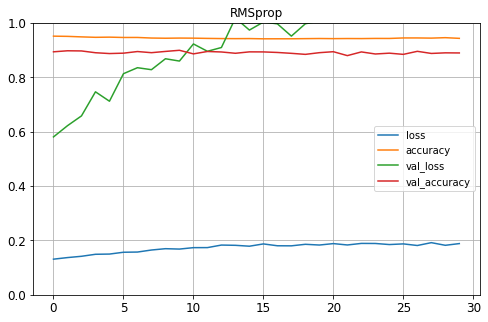

In [37]:
import pandas as pd

pd.DataFrame(history2.history).plot(figsize=(8, 5), title=('RMSprop'))

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [38]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.2515 - accuracy: 0.8808


[1.2514894008636475, 0.8808000087738037]

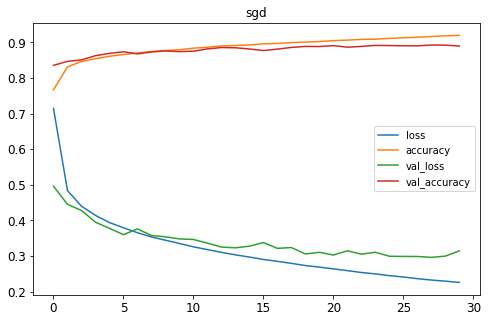

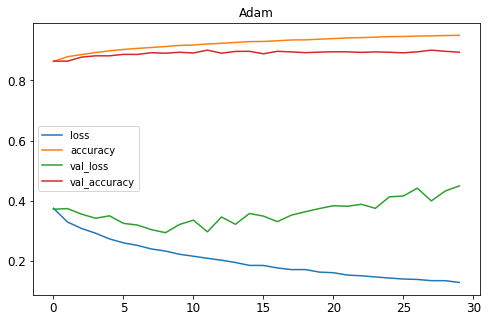

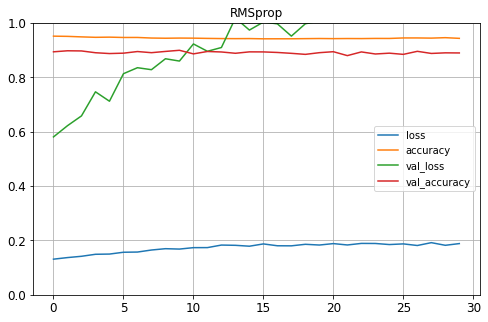

In [41]:
pd.DataFrame(history.history).plot(figsize=(8, 5), title=('sgd'))
pd.DataFrame(history1.history).plot(figsize=(8, 5), title=('Adam'))
pd.DataFrame(history2.history).plot(figsize=(8, 5), title=('RMSprop'))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

2) **Plot Learning curves when using different batch size**

batch_size=5


In [42]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="SGD",
              metrics=["accuracy"])

In [46]:
history3 = model.fit(X_train, y_train, batch_size=5, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
11000/11000 [==============================] - 18s 2ms/step - loss: 0.1675 - accuracy: 0.9410 - val_loss: 0.4916 - val_accuracy: 0.8886
Epoch 2/30
11000/11000 [==============================] - 18s 2ms/step - loss: 0.1640 - accuracy: 0.9417 - val_loss: 0.4669 - val_accuracy: 0.8838
Epoch 3/30
11000/11000 [==============================] - 18s 2ms/step - loss: 0.1563 - accuracy: 0.9442 - val_loss: 0.5170 - val_accuracy: 0.8868
Epoch 4/30
11000/11000 [==============================] - 18s 2ms/step - loss: 0.1598 - accuracy: 0.9435 - val_loss: 0.4775 - val_accuracy: 0.8912
Epoch 5/30
11000/11000 [==============================] - 18s 2ms/step - loss: 0.1522 - accuracy: 0.9454 - val_loss: 0.5204 - val_accuracy: 0.8924
Epoch 6/30
11000/11000 [==============================] - 18s 2ms/step - loss: 0.1498 - accuracy: 0.9476 - val_loss: 0.5208 - val_accuracy: 0.8844
Epoch 7/30
11000/11000 [==============================] - 18s 2ms/step - loss: 0.1511 - accuracy: 0.9455 - val_loss: 0

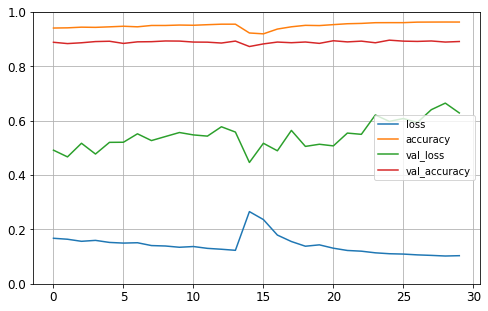

In [47]:
import pandas as pd

pd.DataFrame(history3.history).plot(figsize=(8, 5))

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

batch_size=50

In [48]:
history4 = model.fit(X_train, y_train, batch_size=50, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1100/1100 [==============================] - 4s 4ms/step - loss: 0.0786 - accuracy: 0.9729 - val_loss: 0.6356 - val_accuracy: 0.8932
Epoch 2/30
1100/1100 [==============================] - 4s 4ms/step - loss: 0.0747 - accuracy: 0.9747 - val_loss: 0.6466 - val_accuracy: 0.8940
Epoch 3/30
1100/1100 [==============================] - 4s 4ms/step - loss: 0.0737 - accuracy: 0.9748 - val_loss: 0.6464 - val_accuracy: 0.8954
Epoch 4/30
1100/1100 [==============================] - 4s 4ms/step - loss: 0.0728 - accuracy: 0.9754 - val_loss: 0.6491 - val_accuracy: 0.8952
Epoch 5/30
1100/1100 [==============================] - 4s 4ms/step - loss: 0.0725 - accuracy: 0.9755 - val_loss: 0.6532 - val_accuracy: 0.8954
Epoch 6/30
1100/1100 [==============================] - 4s 4ms/step - loss: 0.0718 - accuracy: 0.9758 - val_loss: 0.6568 - val_accuracy: 0.8924
Epoch 7/30
1100/1100 [==============================] - 4s 4ms/step - loss: 0.0716 - accuracy: 0.9757 - val_loss: 0.6530 - val_accuracy:

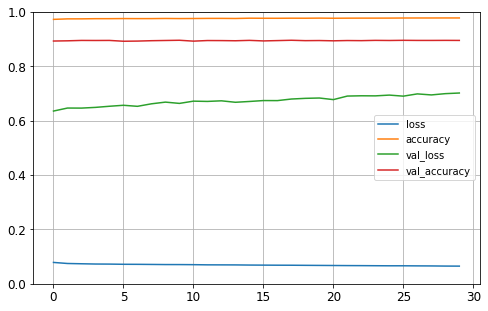

In [49]:
import pandas as pd

pd.DataFrame(history4.history).plot(figsize=(8, 5))

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

3) Plot Learning curves when using different number of **epochs**

epochs=10

In [50]:
history5= model.fit(X_train, y_train, batch_size=32, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0663 - accuracy: 0.9777 - val_loss: 0.6967 - val_accuracy: 0.8932
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0658 - accuracy: 0.9779 - val_loss: 0.7053 - val_accuracy: 0.8944
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0654 - accuracy: 0.9779 - val_loss: 0.7103 - val_accuracy: 0.8964
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0652 - accuracy: 0.9781 - val_loss: 0.7116 - val_accuracy: 0.8954
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0648 - accuracy: 0.9784 - val_loss: 0.7128 - val_accuracy: 0.8952
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0646 - accuracy: 0.9787 - val_loss: 0.7141 - val_accuracy: 0.8960
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0641 - accuracy: 0.9793 - val_loss: 0.7074 - val_accuracy:

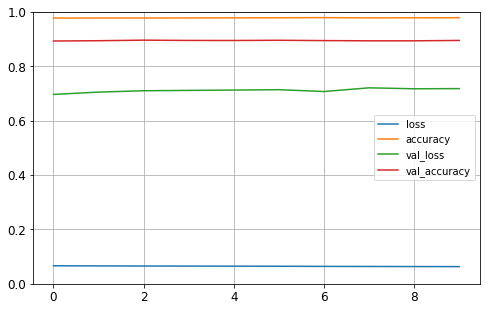

In [51]:
import pandas as pd

pd.DataFrame(history5.history).plot(figsize=(8, 5))

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

epochs=40

In [79]:
history6= model.fit(X_train, y_train, batch_size=32, epochs=40,
                    validation_data=(X_valid, y_valid))

Epoch 1/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2716 - accuracy: 0.9001 - val_loss: 0.2973 - val_accuracy: 0.8922
Epoch 2/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2712 - accuracy: 0.8999 - val_loss: 0.2820 - val_accuracy: 0.8986
Epoch 3/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2659 - accuracy: 0.9020 - val_loss: 0.3044 - val_accuracy: 0.8926
Epoch 4/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2656 - accuracy: 0.9021 - val_loss: 0.2908 - val_accuracy: 0.8970
Epoch 5/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2628 - accuracy: 0.9036 - val_loss: 0.2855 - val_accuracy: 0.8960
Epoch 6/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2602 - accuracy: 0.9036 - val_loss: 0.2964 - val_accuracy: 0.8936
Epoch 7/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2559 - accuracy: 0.9056 - val_loss: 0.2915 - val_accuracy:

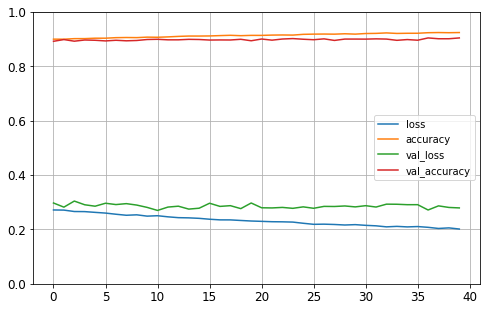

In [80]:
import pandas as pd

pd.DataFrame(history6.history).plot(figsize=(8, 5))

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**4) Add additional neurons and use Dropout Layer. Plot Learning curves.**

In [52]:
from keras.layers import Dropout

In [56]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(600, activation="relu"))
model.add((keras.layers.Dropout(0.3)))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(50, activation="softmax"))


In [57]:
model.layers

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 600)               471000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 300)               180300    
_________________________________________________________________
dense_11 (Dense)             (None, 50)                15050     
Total params: 666,350
Trainable params: 666,350
Non-trainable params: 0
_________________________________________________________________


In [59]:
hidden1 = model.layers[3]
hidden1.name

'dense_10'

In [60]:
weights, biases = hidden1.get_weights()

In [61]:
weights

array([[ 0.05887577, -0.03440785, -0.07797544, ...,  0.05613439,
         0.07105143, -0.0561561 ],
       [-0.01694702,  0.04249687, -0.06337332, ...,  0.01198722,
        -0.07322873, -0.03706126],
       [-0.02779901, -0.00968142,  0.05590393, ...,  0.05754134,
         0.06104176,  0.01902957],
       ...,
       [ 0.04489802, -0.0450586 , -0.0261163 , ...,  0.04665022,
        -0.04205404,  0.025424  ],
       [-0.04680503, -0.06183435, -0.03163639, ...,  0.02761139,
         0.05354519,  0.02389123],
       [ 0.04371804,  0.0550037 ,  0.00033862, ...,  0.06629032,
        -0.00302868, -0.02619923]], dtype=float32)

In [62]:
weights.shape

(600, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [63]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [64]:
history7 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))



Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.8011 - accuracy: 0.7383 - val_loss: 0.5386 - val_accuracy: 0.8128
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5271 - accuracy: 0.8161 - val_loss: 0.4552 - val_accuracy: 0.8446
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4693 - accuracy: 0.8364 - val_loss: 0.4255 - val_accuracy: 0.8524
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4343 - accuracy: 0.8471 - val_loss: 0.3960 - val_accuracy: 0.8568
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4098 - accuracy: 0.8559 - val_loss: 0.3843 - val_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3933 - accuracy: 0.8609 - val_loss: 0.3678 - val_accuracy: 0.8706
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3786 - accuracy: 0.8655 - val_loss: 0.3577 - val_accu

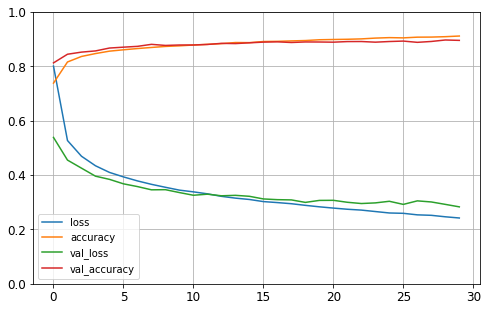

In [66]:
pd.DataFrame(history7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**5) Use Batch Normalisation**

In [67]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(600, activation="relu"))
model.add((keras.layers.Dropout(0.3)))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(50, activation="softmax"))

In [68]:
model.layers

In [69]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [70]:
history8 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6578 - accuracy: 0.7878 - val_loss: 0.4052 - val_accuracy: 0.8622
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4618 - accuracy: 0.8375 - val_loss: 0.3692 - val_accuracy: 0.8742
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4148 - accuracy: 0.8508 - val_loss: 0.3464 - val_accuracy: 0.8746
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3897 - accuracy: 0.8591 - val_loss: 0.3563 - val_accuracy: 0.8728
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3665 - accuracy: 0.8670 - val_loss: 0.3308 - val_accuracy: 0.8796
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3542 - accuracy: 0.8712 - val_loss: 0.3299 - val_accuracy: 0.8828
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3391 - accuracy: 0.8773 - val_loss: 0.3164 - val_accura

In [71]:
eval = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3126 - accuracy: 0.8927


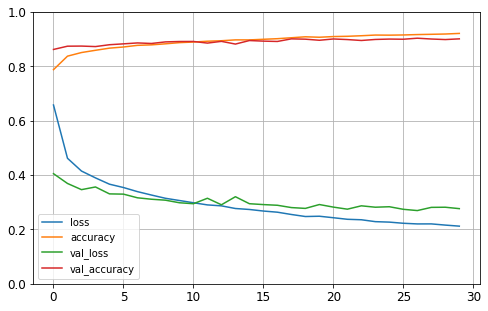

In [72]:
pd.DataFrame(history8.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**6) repeat with more layers**

In [73]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add((keras.layers.Dropout(0.3)))
model.add(keras.layers.Dense(200, activation="relu"))
model.add((keras.layers.Dropout(0.3)))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(30, activation="softmax"))

In [74]:
model.layers

In [76]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [77]:
history9 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8778 - accuracy: 0.7051 - val_loss: 0.4652 - val_accuracy: 0.8328
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5417 - accuracy: 0.8063 - val_loss: 0.4079 - val_accuracy: 0.8552
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4816 - accuracy: 0.8277 - val_loss: 0.3885 - val_accuracy: 0.8604
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4490 - accuracy: 0.8396 - val_loss: 0.3630 - val_accuracy: 0.8708
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4282 - accuracy: 0.8460 - val_loss: 0.3439 - val_accuracy: 0.8758
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4118 - accuracy: 0.8493 - val_loss: 0.3435 - val_accuracy: 0.8748
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3972 - accuracy: 0.8556 - val_loss: 0.3394 - val_accuracy:

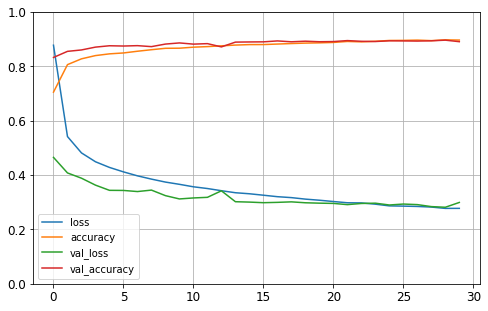

In [78]:
pd.DataFrame(history9.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
minist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = minist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

In [ ]:
class_names[y_train[4]]

'1'

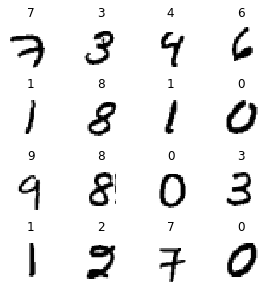

In [ ]:
n_rows = 4
n_cols = 4
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

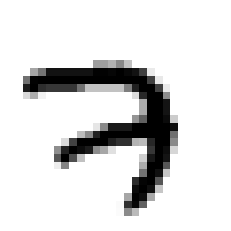

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

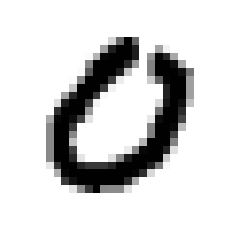

In [ ]:
plt.imshow(X_train[7], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add((keras.layers.Dropout(0.3)))
model.add(keras.layers.Dense(180, activation="relu"))
model.add((keras.layers.Dropout(0.3)))
model.add(keras.layers.Dense(90, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 300)               235500    
_________________________________________________________________
dropout_6 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 180)               54180     
_________________________________________________________________
dropout_7 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 90)                16290     
_________________________________________________________________
batch_normalization_3 (Batch (None, 90)               

In [ ]:
hidden1 = model.layers[3]
hidden1.name

'dense_18'

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.00861768,  0.02491942, -0.05415845, ..., -0.05272148,
         0.00309245, -0.08093777],
       [-0.02886537,  0.07962069, -0.08836792, ...,  0.05434731,
         0.05253091,  0.03567757],
       [ 0.02215625, -0.05146134, -0.08521081, ..., -0.02138585,
         0.04999168,  0.07195511],
       ...,
       [-0.00815005, -0.04938604,  0.08716935, ..., -0.05934779,
        -0.0143195 ,  0.08128305],
       [ 0.02675629,  0.05019395,  0.00461994, ...,  0.03650966,
         0.08062853,  0.0824666 ],
       [ 0.03867584,  0.01762369, -0.09385164, ...,  0.00244289,
         0.07034339,  0.06795157]], dtype=float32)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history7 = model.fit(X_train, y_train, batch_size=32, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5908 - accuracy: 0.8168 - val_loss: 0.2064 - val_accuracy: 0.9410
Epoch 2/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2982 - accuracy: 0.9104 - val_loss: 0.1496 - val_accuracy: 0.9556
Epoch 3/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2333 - accuracy: 0.9299 - val_loss: 0.1235 - val_accuracy: 0.9654
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1954 - accuracy: 0.9408 - val_loss: 0.1100 - val_accuracy: 0.9686
Epoch 5/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1704 - accuracy: 0.9488 - val_loss: 0.1030 - val_accuracy: 0.9712


In [ ]:
eval = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9691


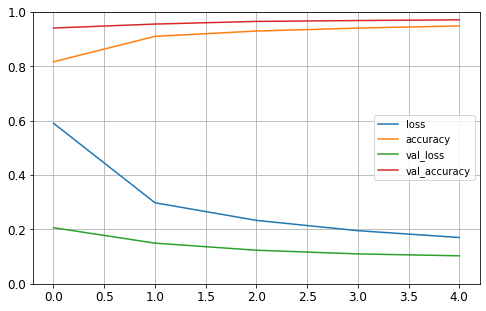

In [ ]:
pd.DataFrame(history7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()